In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import math

In [2]:
dados = pd.read_csv('../scrapped-content/full_cities_analysis.csv', sep=',', keep_default_na=False, true_values=["t"], false_values=["f"])

In [3]:
dados.describe().round(2)

,city_id,year,greater_region_code,total_gdp_1000_brl,gdp_per_capita_brl,public_expending_value_1000_brl,agro_value_1000_brl,industry_value_1000_brl,services_value_1000_brl,taxes_value_1000_brl,distance_equator_km
count,55685.00,55685.00,55685.00,5.568500e+04,55685.00,5.568500e+04,55685.00,55685.00,5.568500e+04,5.568500e+04,55685.00
mean,3253429.67,2014.50,2.90,1.031363e+06,18961.03,1.496661e+05,45431.24,207058.93,4.829187e+05,1.467619e+05,1832.67
std,984714.21,2.87,1.09,1.042699e+07,21034.77,1.391605e+06,81787.85,1333025.07,6.410927e+06,1.907779e+06,917.96
min,1100015.00,2010.00,1.00,4.199000e+03,301.60,4.227000e+03,0.00,99.00,1.207000e+03,2.100000e+01,3.00
25%,2512101.00,2012.00,2.00,6.326900e+04,7999.42,2.113700e+04,8731.00,3221.00,1.488300e+04,2.437000e+03,945.00
50%,3146255.00,2015.00,3.00,1.410570e+05,13591.61,4.044700e+04,21816.00,10180.00,3.882600e+04,7.359000e+03,2014.00
75%,4119152.00,2017.00,4.00,3.816070e+05,23197.00,8.765500e+04,49489.00,56445.00,1.246540e+05,2.820100e+04,2542.00
max,5300108.00,2019.00,5.00,7.638060e+08,815697.76,1.072192e+08,2482542.00,66893050.00,5.283801e+08,1.324779e+08,3749.00


In [4]:
dados.head()


,city_id,year,city_name,state_acronym,greater_region_name,greater_region_code,metropolitan_region,is_legal_amazon,is_semi_arid,is_sao_paulo_region,...,most_valueable_sector,second_most_valueable_sector,gdp_per_capita_brl_growth,gdp_per_capita_brl_growth_percent,total_gdp_1000_brl_growth,total_gdp_1000_brl_growth_percent,population_growth,population_growth_percent,is_capital,distance_equator_km
0,1100015,2010,Alta Floresta D'Oeste,RO,Norte,1,,True,False,False,...,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",10869.55,1.01,233552.00,0.89,-1712,-0.07,False,1327
1,1100023,2010,Ariquemes,RO,Norte,1,,True,False,False,...,"Administração, defesa, educação e saúde públic...",Demais serviços,8804.52,0.58,1214136.00,0.89,19578,0.21,False,1102
2,1100031,2010,Cabixi,RO,Norte,1,,True,False,False,...,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",15314.16,1.39,70348.00,1.01,-1154,-0.19,False,1502
3,1100049,2010,Cacoal,RO,Norte,1,,True,False,False,...,"Administração, defesa, educação e saúde públic...",Demais serviços,11388.80,0.75,1074150.00,0.91,7457,0.09,False,1272
4,1100056,2010,Cerejeiras,RO,Norte,1,,True,False,False,...,"Administração, defesa, educação e saúde públic...",Demais serviços,18014.49,1.38,284833.00,1.28,-851,-0.05,False,1467


In [5]:
dados.corr().round(4)

,city_id,year,greater_region_code,is_legal_amazon,is_semi_arid,is_sao_paulo_region,total_gdp_1000_brl,gdp_per_capita_brl,public_expending_value_1000_brl,agro_value_1000_brl,industry_value_1000_brl,services_value_1000_brl,taxes_value_1000_brl,is_capital,distance_equator_km
city_id,1.0000,0.0002,0.9766,-0.3930,-0.3693,0.0365,0.0238,0.3140,0.0208,0.1842,0.0275,0.0201,0.0199,-0.0237,0.7394
year,0.0002,1.0000,0.0002,0.0001,-0.0002,-0.0000,0.0185,0.1770,0.0239,0.1112,0.0165,0.0163,0.0125,-0.0000,0.0002
greater_region_code,0.9766,0.0002,1.0000,-0.3437,-0.4108,0.0122,0.0193,0.3118,0.0178,0.1887,0.0230,0.0156,0.0157,-0.0219,0.7312
is_legal_amazon,-0.3930,0.0001,-0.3437,1.0000,-0.2171,-0.0520,-0.0155,-0.0697,-0.0059,0.1143,-0.0220,-0.0161,-0.0160,0.0393,-0.4546
is_semi_arid,-0.3693,-0.0002,-0.4108,-0.2171,1.0000,-0.0702,-0.0418,-0.2765,-0.0313,-0.1793,-0.0704,-0.0336,-0.0359,-0.0316,-0.5093
is_sao_paulo_region,0.0365,-0.0000,0.0122,-0.0520,-0.0702,1.0000,0.1797,0.1623,0.0864,-0.0323,0.2413,0.1698,0.1814,0.0112,0.1084
total_gdp_1000_brl,0.0238,0.0185,0.0193,-0.0155,-0.0418,0.1797,1.0000,0.1290,0.7572,0.0691,0.8615,0.9890,0.9850,0.4600,0.0388
gdp_per_capita_brl,0.3140,0.1770,0.3118,-0.0697,-0.2765,0.1623,0.1290,1.0000,0.0825,0.2803,0.2801,0.0964,0.1136,0.0416,0.3471
public_expending_value_1000_brl,0.0208,0.0239,0.0178,-0.0059,-0.0313,0.0864,0.7572,0.0825,1.0000,0.1222,0.5785,0.6819,0.7081,0.4718,0.0132
agro_value_1000_brl,0.1842,0.1112,0.1887,0.1143,-0.1793,-0.0323,0.0691,0.2803,0.1222,1.0000,0.0734,0.0448,0.0441,0.0399,0.0966


<AxesSubplot:title={'center':'Gdp per capita year'}, xlabel='Year', ylabel='$$$'>

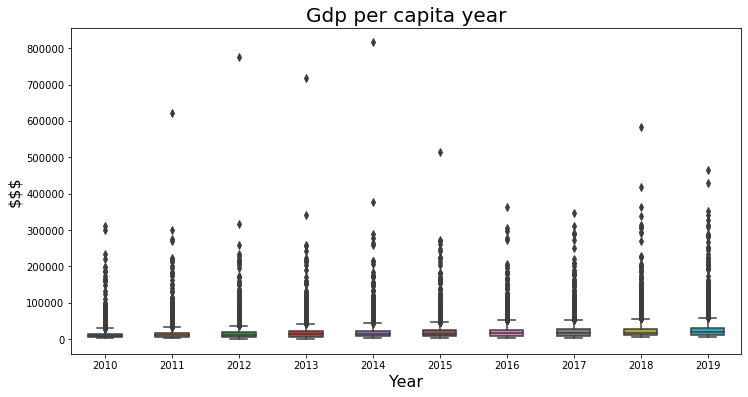

In [6]:
ax = sns.boxplot(y='gdp_per_capita_brl', x='year', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Gdp per capita year', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax

C:\Users\plini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='gdp_per_capita_brl', ylabel='Gdp per capita'>

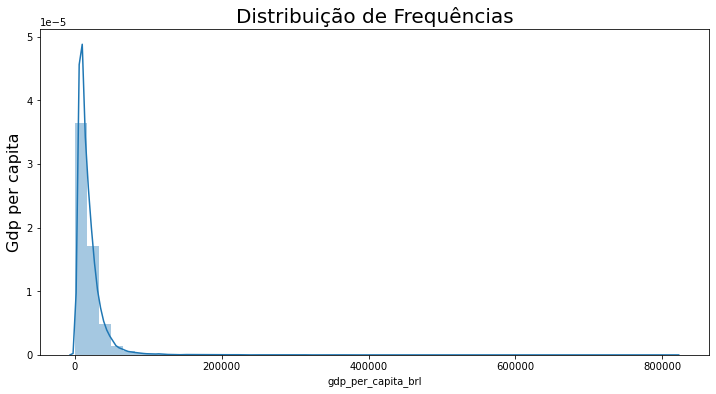

In [7]:
ax = sns.distplot(dados['gdp_per_capita_brl'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Gdp per capita', fontsize=16)
ax

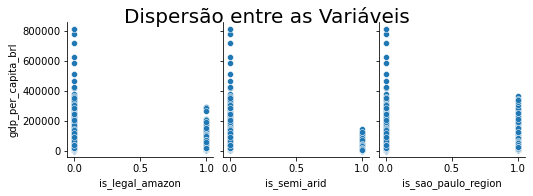

In [8]:
ax = sns.pairplot(dados, y_vars='gdp_per_capita_brl', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [9]:

dados['log_gdp_per_capita'] = np.log(dados['gdp_per_capita_brl'])

C:\Users\plini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências Log'}, xlabel='log_gdp_per_capita', ylabel='Gdp per capita'>

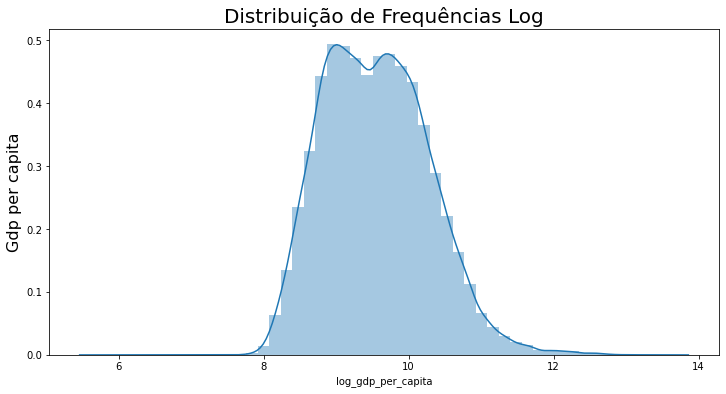

In [10]:
ax = sns.distplot(dados['log_gdp_per_capita'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências Log', fontsize=20)
ax.set_ylabel('Gdp per capita', fontsize=16)
ax

<AxesSubplot:title={'center':'Gdp per capita year log'}, xlabel='Year', ylabel='$$$'>

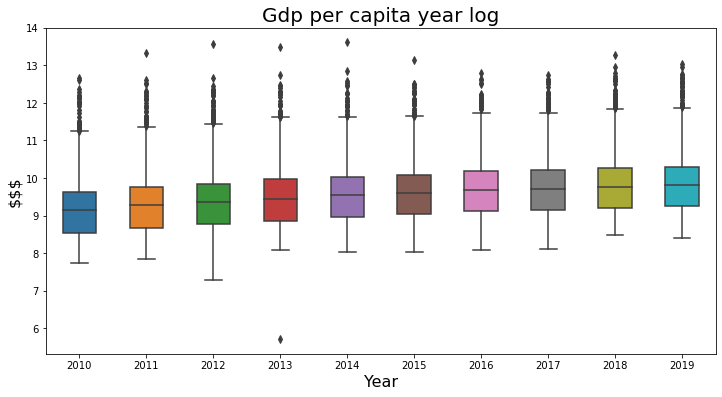

In [11]:
ax = sns.boxplot(y='log_gdp_per_capita', x='year', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Gdp per capita year log', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax

<AxesSubplot:title={'center':'Gdp per capita year log'}, xlabel='SemiArid', ylabel='$$$'>

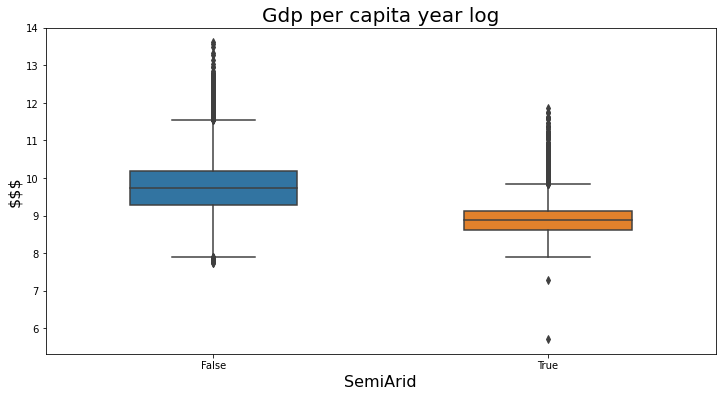

In [12]:
ax = sns.boxplot(y='log_gdp_per_capita', x='is_semi_arid', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Gdp per capita year log', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('SemiArid', fontsize=16)
ax

<AxesSubplot:title={'center':'Gdp per capita year log'}, xlabel='Is Legal Amazon?', ylabel='$$$'>

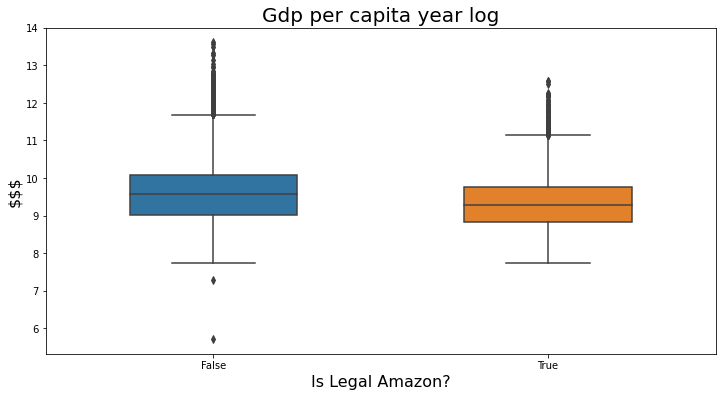

In [13]:
ax = sns.boxplot(y='log_gdp_per_capita', x='is_legal_amazon', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Gdp per capita year log', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Is Legal Amazon?', fontsize=16)
ax

In [14]:
dados['is_metropolitan_region'] = [True if len(x) > 0 else False for x in dados['metropolitan_region']]

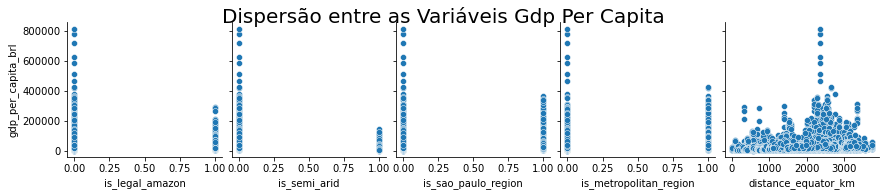

In [15]:
ax = sns.pairplot(dados, y_vars='gdp_per_capita_brl', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region', 'is_metropolitan_region', 'distance_equator_km'])
ax.fig.suptitle('Dispersão entre as Variáveis Gdp Per Capita', fontsize=20, y=1.05)
ax

In [16]:
dados_2019 = dados[dados.year == 2019]
dados_2019.head()

,city_id,year,city_name,state_acronym,greater_region_name,greater_region_code,metropolitan_region,is_legal_amazon,is_semi_arid,is_sao_paulo_region,...,gdp_per_capita_brl_growth,gdp_per_capita_brl_growth_percent,total_gdp_1000_brl_growth,total_gdp_1000_brl_growth_percent,population_growth,population_growth_percent,is_capital,distance_equator_km,log_gdp_per_capita,is_metropolitan_region
50115,1100015,2019,Alta Floresta D'Oeste,RO,Norte,1,,True,False,False,...,10869.55,1.01,233552.00,0.89,-1712,-0.07,False,1327,9.980482,False
50116,1100023,2019,Ariquemes,RO,Norte,1,,True,False,False,...,8804.52,0.58,1214136.00,0.89,19578,0.21,False,1102,10.081984,False
50117,1100031,2019,Cabixi,RO,Norte,1,,True,False,False,...,15314.16,1.39,70348.00,1.01,-1154,-0.19,False,1502,10.179139,False
50118,1100049,2019,Cacoal,RO,Norte,1,,True,False,False,...,11388.80,0.75,1074150.00,0.91,7457,0.09,False,1272,10.184294,False
50119,1100056,2019,Cerejeiras,RO,Norte,1,,True,False,False,...,18014.49,1.38,284833.00,1.28,-851,-0.05,False,1467,10.343404,False


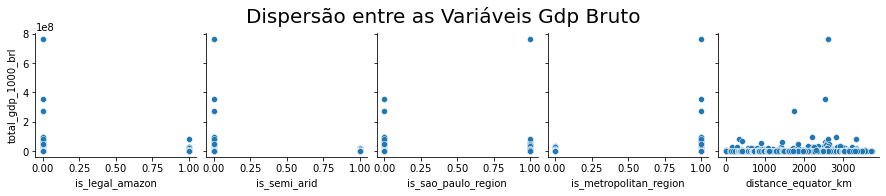

In [17]:
ax = sns.pairplot(dados_2019, y_vars='total_gdp_1000_brl', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region', 'is_metropolitan_region', 'distance_equator_km'])
ax.fig.suptitle('Dispersão entre as Variáveis Gdp Bruto', fontsize=20, y=1.05)
ax

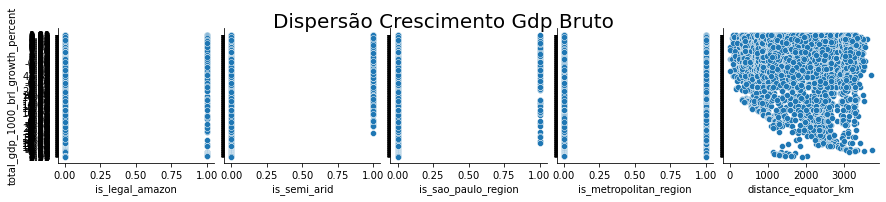

In [18]:
ax = sns.pairplot(dados_2019, y_vars='total_gdp_1000_brl_growth_percent', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region', 'is_metropolitan_region', 'distance_equator_km'])
ax.fig.suptitle('Dispersão Crescimento Gdp Bruto', fontsize=20, y=1.05)
ax

<AxesSubplot:title={'center':'Gdp per capita year log'}, xlabel='SemiArid', ylabel='$$$'>

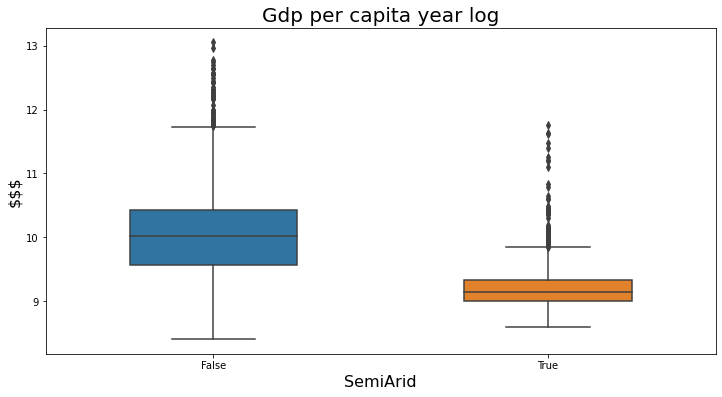

In [19]:
ax = sns.boxplot(y='log_gdp_per_capita', x='is_semi_arid', data=dados_2019, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Gdp per capita year log', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('SemiArid', fontsize=16)
ax